**Importing Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # graph plot
import seaborn as sns # complex graph plot


**Importing Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

nRowsRead = 100000 # specify 'None' if want to read whole file
# Dataset-Unicauca-Version2-87Atts.csv has 3577296 rows in reality, but we are only loading/previewing the first 1000 rows

df1 = pd.read_csv('/content/drive/MyDrive/Internship College/Copy of Dataset-Unicauca-Version2-87Atts.csv',delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Dataset-Unicauca-Version2-87Atts.csv'
nRow, nCol = df1.shape

print(f'There are {nRow} rows and {nCol} columns')

Mounted at /content/drive
There are 100000 rows and 87 columns


In [3]:
df1.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,...,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,110414,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880.0,1,45523.0,2167.761905,1319.384512,5988.0,698,41178,762.555556,1230.348220,5133.0,1,0,0,0,0,...,1121.579194,1.257940e+06,0,0,0,0,1,0,0,0,2,1435.74026,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.000000,0.000000,1.0,1,0,0.000000,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.00000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1.0,0,1.0,0.500000,0.707107,1.0,0,0,0.000000,0.000000,0.0,0,1,0,0,0,...,168.500000,2.839225e+04,0,1,0,0,1,0,0,0,0,337.00000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.000000,0.000000,0.0,0,107,53.500000,75.660426,107.0,0,0,0,0,0,...,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,3,0.00000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,19517.000000,25758.502350,54313.0,0,0,0.000000,0.000000,0.0,0,1,0,0,0,...,286.458898,8.205870e+04,0,1,0,0,1,0,0,0,0,321.00000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY


**Attribute Colume**

In [4]:
for col in df1.columns:
    print(col)


Flow.ID
Source.IP
Source.Port
Destination.IP
Destination.Port
Protocol
Timestamp
Flow.Duration
Total.Fwd.Packets
Total.Backward.Packets
Total.Length.of.Fwd.Packets
Total.Length.of.Bwd.Packets
Fwd.Packet.Length.Max
Fwd.Packet.Length.Min
Fwd.Packet.Length.Mean
Fwd.Packet.Length.Std
Bwd.Packet.Length.Max
Bwd.Packet.Length.Min
Bwd.Packet.Length.Mean
Bwd.Packet.Length.Std
Flow.Bytes.s
Flow.Packets.s
Flow.IAT.Mean
Flow.IAT.Std
Flow.IAT.Max
Flow.IAT.Min
Fwd.IAT.Total
Fwd.IAT.Mean
Fwd.IAT.Std
Fwd.IAT.Max
Fwd.IAT.Min
Bwd.IAT.Total
Bwd.IAT.Mean
Bwd.IAT.Std
Bwd.IAT.Max
Bwd.IAT.Min
Fwd.PSH.Flags
Bwd.PSH.Flags
Fwd.URG.Flags
Bwd.URG.Flags
Fwd.Header.Length
Bwd.Header.Length
Fwd.Packets.s
Bwd.Packets.s
Min.Packet.Length
Max.Packet.Length
Packet.Length.Mean
Packet.Length.Std
Packet.Length.Variance
FIN.Flag.Count
SYN.Flag.Count
RST.Flag.Count
PSH.Flag.Count
ACK.Flag.Count
URG.Flag.Count
CWE.Flag.Count
ECE.Flag.Count
Down.Up.Ratio
Average.Packet.Size
Avg.Fwd.Segment.Size
Avg.Bwd.Segment.Size
Fwd.Header.

**Removing string column and Encoding The String Data Column Into Integer Column**

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
df2=df1
df2["labels"] = LabelEncoder().fit_transform(df2["ProtocolName"])

df2.drop(columns =["Source.IP", "Source.Port", "Destination.IP", "Destination.Port","Timestamp","Flow.ID","ProtocolName","Label"], inplace = True)
 
df2.head()

,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,labels
0,6,45523,22,55,132,110414,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880.0,1,45523.0,2167.761905,1319.384512,5988.0,698,41178,762.555556,1230.348220,5133.0,1,0,0,0,0,440,1100,4.832722e+02,1208.180480,6,4380,1417.333333,1121.579194,1.257940e+06,0,0,0,0,1,0,0,0,2,1435.74026,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,0.0,0.0,0,0,0.0,0.0,0,0,131,18
1,6,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.000000,0.000000,1.0,1,0,0.000000,0.000000,0.0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.00000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,131,18
2,6,1,3,0,674,0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1.0,0,1.0,0.500000,0.707107,1.0,0,0,0.000000,0.000000,0.0,0,1,0,0,0,96,0,3.000000e+06,0.000000,0,337,252.750000,168.500000,2.839225e+04,0,1,0,0,1,0,0,0,0,337.00000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,7,15
3,6,217,1,3,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.000000,0.000000,0.0,0,107,53.500000,75.660426,107.0,0,0,0,0,0,32,96,4.608295e+03,13824.884793,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,3,0.00000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,0.0,0.0,0,0,0.0,0.0,0,0,7,15
4,6,78068,5,0,1076,0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,19517.000000,25758.502350,54313.0,0,0,0.000000,0.000000,0.0,0,1,0,0,0,100,0,6.404673e+01,0.000000,6,529,267.500000,286.458898,8.205870e+04,0,1,0,0,1,0,0,0,0,321.00000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,0.0,0.0,0,0,0.0,0.0,0,0,131,18


**Graph Exploratory Analysis**


*   It’s also known as Exploratory Data analysis (EDA).
*   It refers to the critical process of performing Initial investigations on data.

*   It’s used to discover patterns, to spot anomalies, to test hypothesis and to
check assumptions with the help of summary statistics and graphical
representations.




*   **Count plot of Labels (Encoded value of protocol name)**






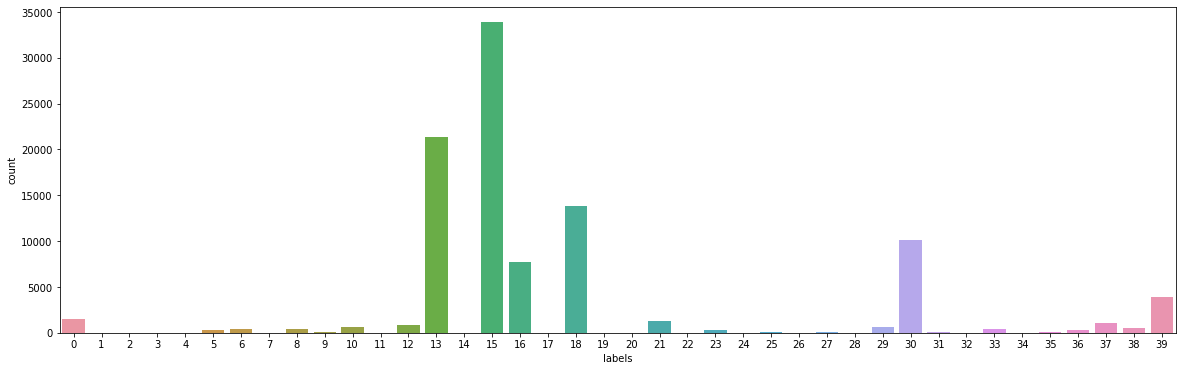

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x='labels', data=df1)

*  **Visualizing Important Features**

L7Protocol                 0.403257
Init_Win_bytes_backward    0.031210
Flow.IAT.Mean              0.025007
Flow.IAT.Max               0.024691
Init_Win_bytes_forward     0.024266
                             ...   
Bwd.Avg.Bytes.Bulk         0.000000
Fwd.Avg.Bulk.Rate          0.000000
Fwd.Avg.Packets.Bulk       0.000000
Fwd.Avg.Bytes.Bulk         0.000000
CWE.Flag.Count             0.000000
Length: 79, dtype: float64



No handles with labels found to put in legend.


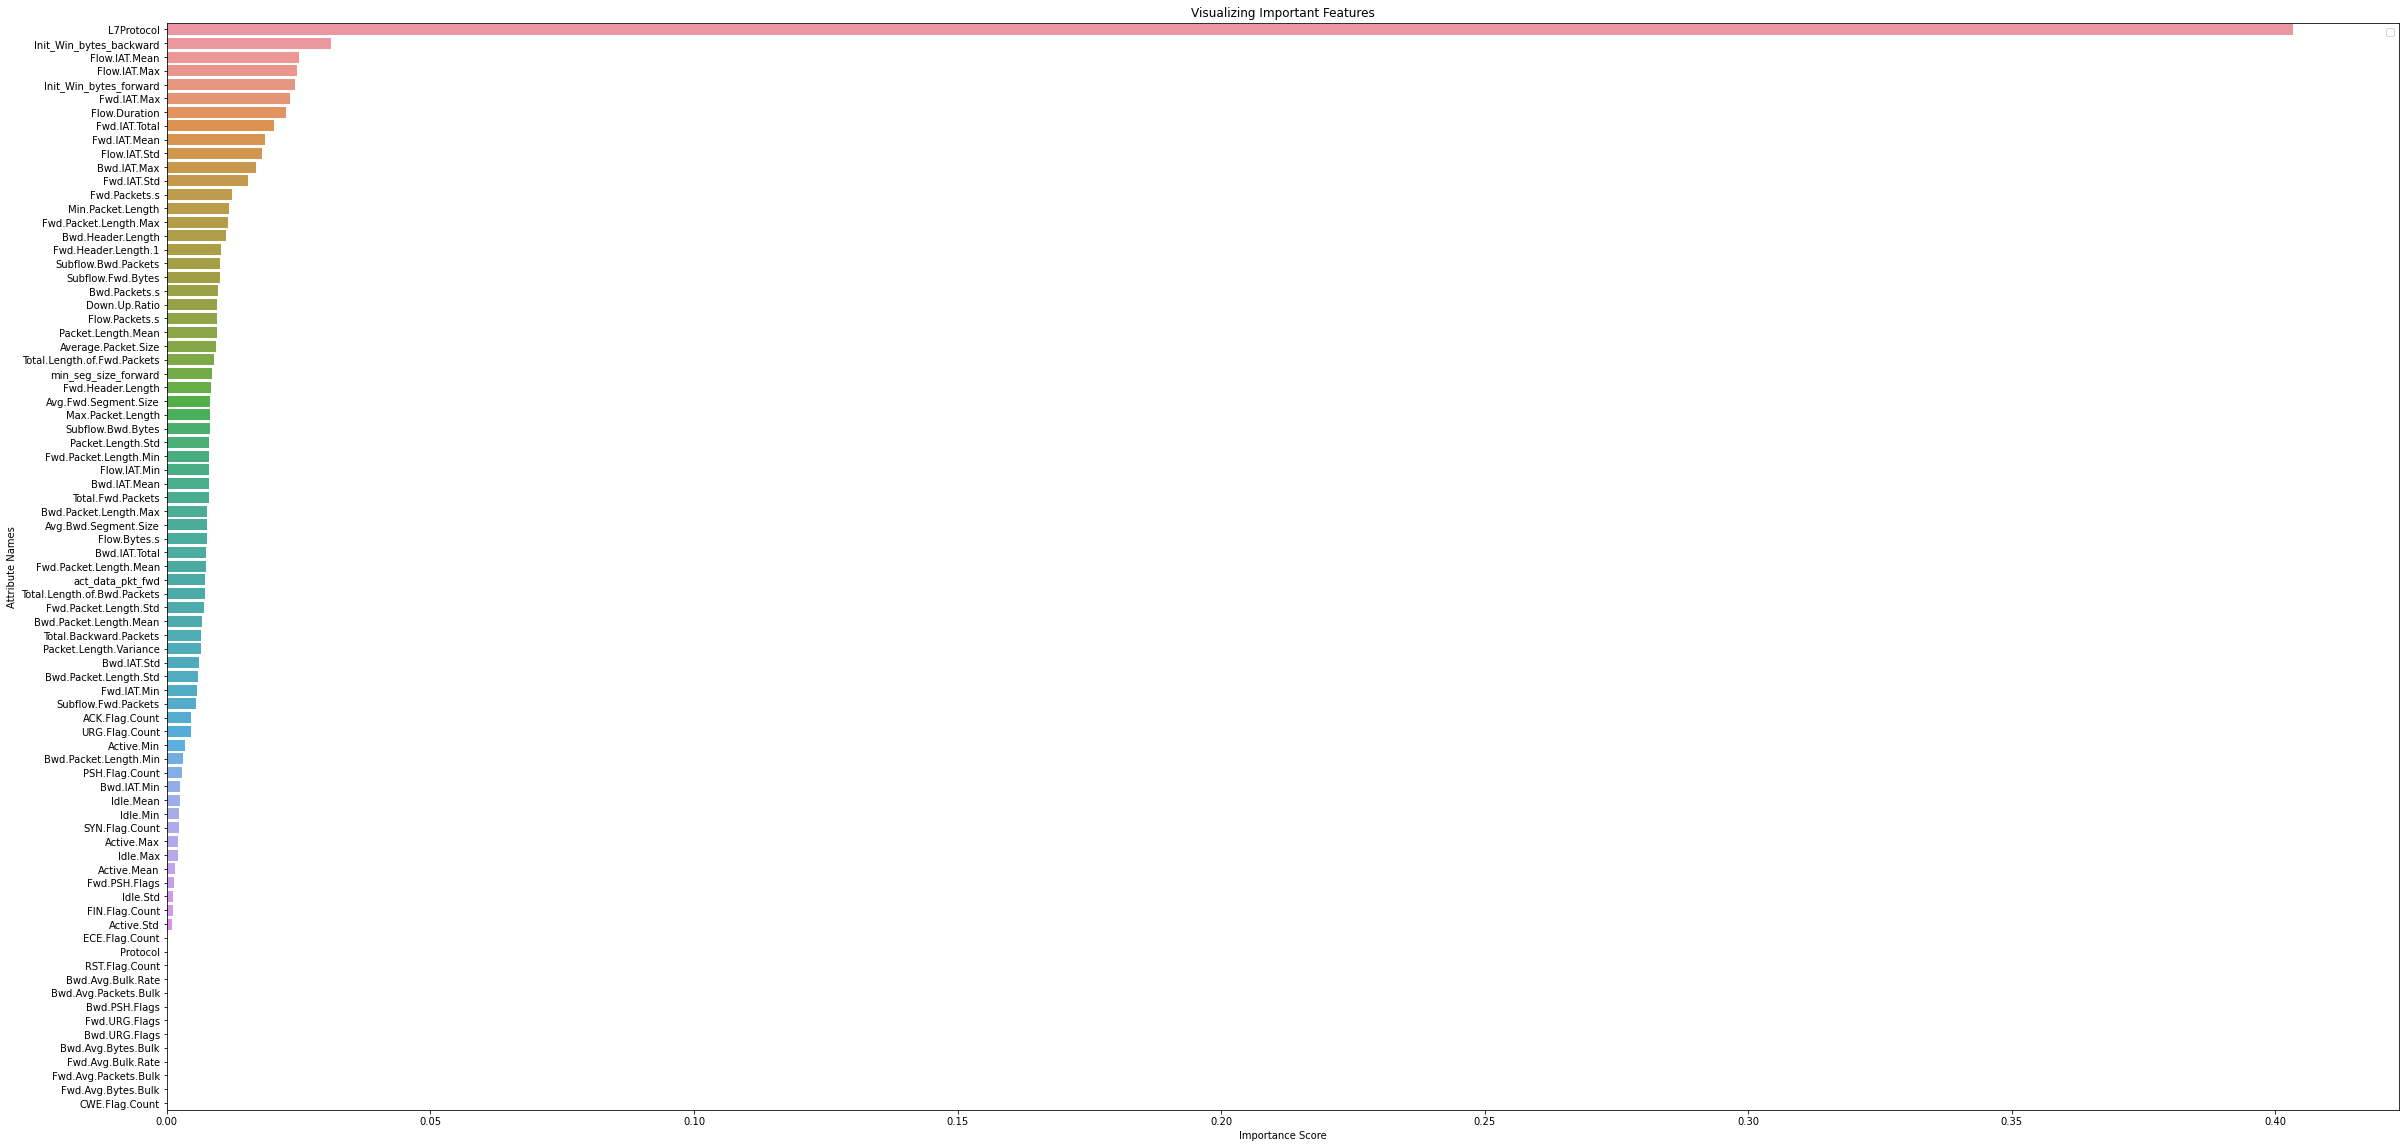

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_imp = pd.Series(clf.feature_importances_,index=df2.columns[:-1]).sort_values(ascending=False)

print(feature_imp)
print()

# Creating a bar 
plt.figure(figsize=(40, 20))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph

plt.xlabel('Importance Score')
plt.ylabel('Attribute Names')
 
plt.title("Visualizing Important Features")
plt.legend()

plt.show()

*   **Joint plot between labels and L7Protocol**

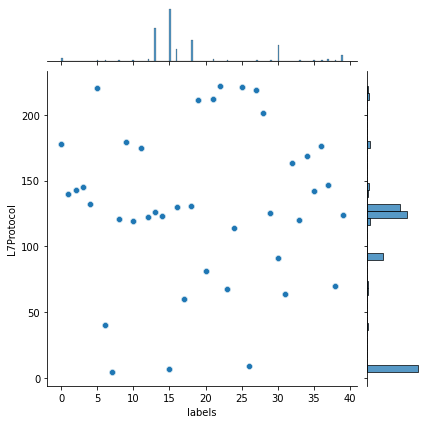

In [ ]:
sns.jointplot(x='labels', y="L7Protocol", data=df2)

*   **Joint plot between labels and Average.Packet.Size**

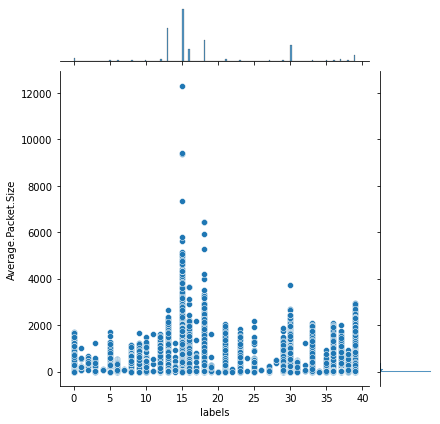

In [ ]:
sns.jointplot(x="labels", y="Average.Packet.Size", data=df2)

**Splitting The Dataset Into The Training Set And Test Set**

In [ ]:
from sklearn.model_selection import train_test_split
X = df2.iloc[:, :-1].values  # All input column
y = df2.iloc[:, -1].values   # All output column

# print(X[:5])
# print()
# print(y[:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# print(X_train[:5])
# print()
# print(X_test)


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler # importing StandandardScalar class from sklearn.preprocessing module
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # doing feature scaling of training data and test data between -3 to 3 
X_test = sc.transform(X_test)
# y_test = sc.transform(y_test)

**Training The Random Forest Classification Model On The Training Set**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10) #try tuning, 100 decision trees
clf.fit(X_train,y_train)
#estimator = clf.estimators_[5]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Building The Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

print()
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy : ", accuracy)

[[239   0   0 ...   0   0   0]
 [  0   2   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 ...
 [  8   0   0 ... 168   0   1]
 [  2   0   0 ...   0  57   1]
 [  1   0   0 ...   0   3 650]]

Accuracy :  0.95255


**Plotting The Confusion Matrix**

Text(0.5, 114.0, 'Predicted')

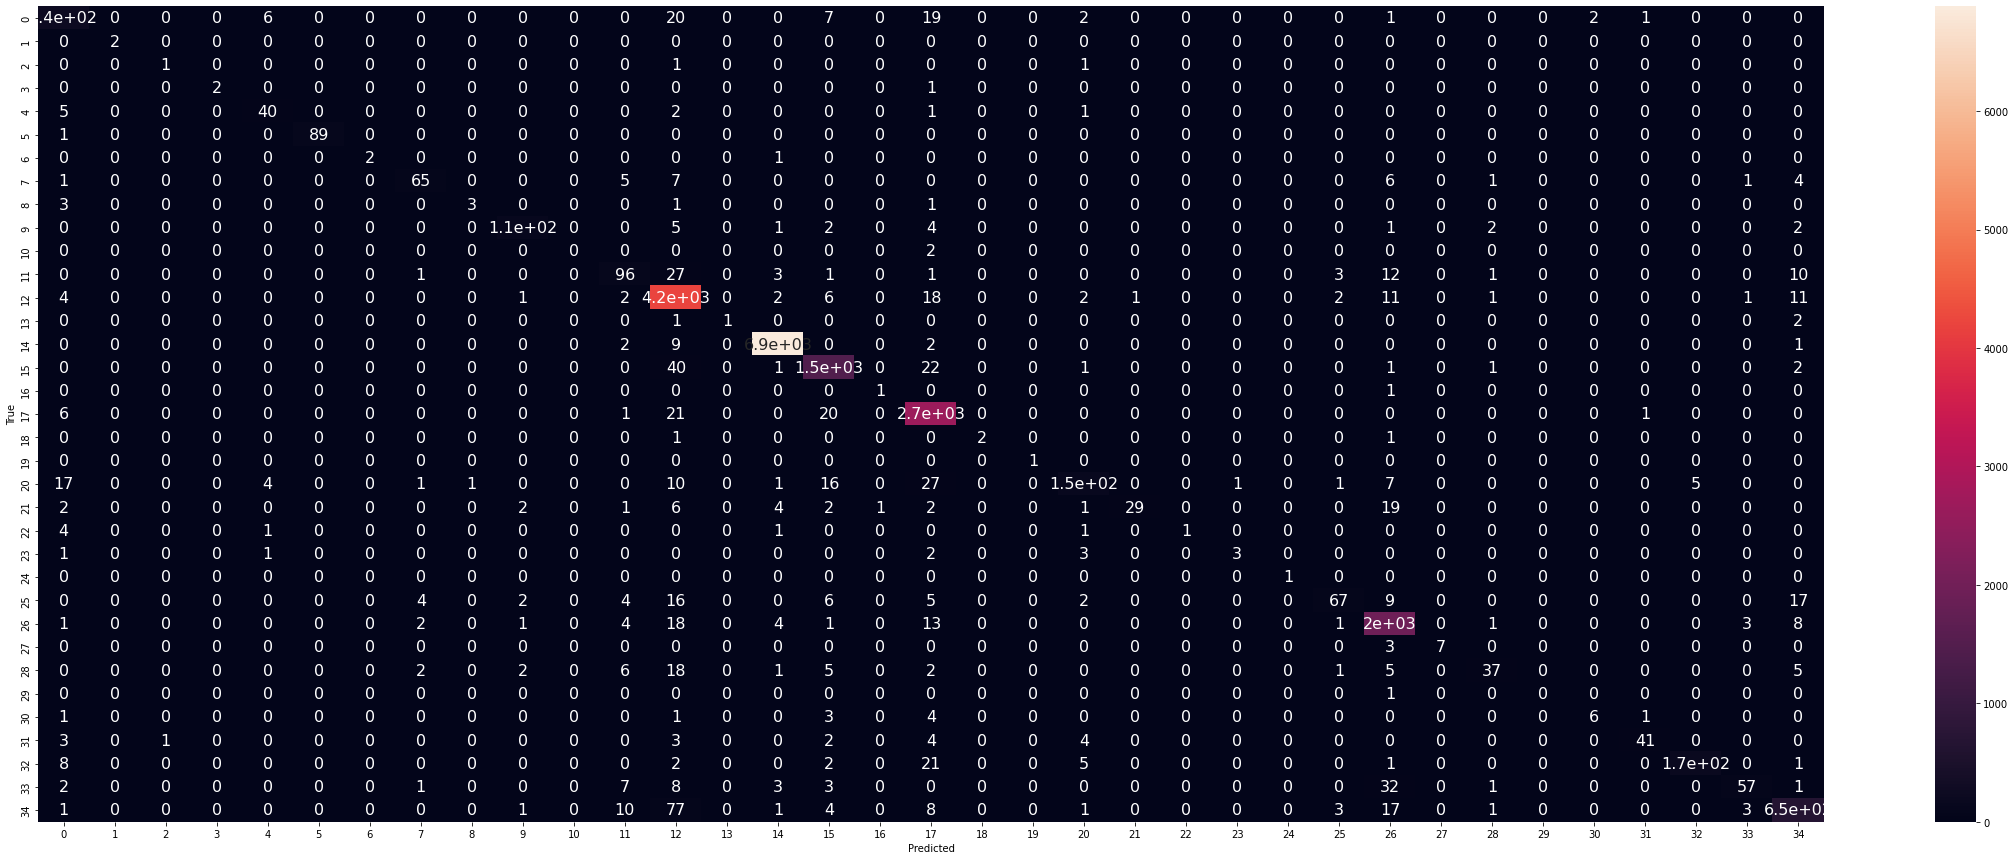

In [ ]:
plt.figure(figsize=(40, 15))
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
plt.ylabel('True')
plt.xlabel('Predicted')